# <span style="color:#cd0057; font-weight:bold">⬇️Step 1: Import Essential Libraries</span>
<hr>

In [307]:
import numpy as np              
import pandas as pd              
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.express as px 

# <span style="color:#cd0057; font-weight:bold">🚚Step 2: Load Dataset</span>
<hr>

In [251]:
# Show all columns and rows in output
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

### <span style="color:#0076cd; font-weight:bold">load all csv files</span>

In [252]:
fact_table = pd.read_csv('csv_files/fact_table.csv', encoding='ISO-8859-1')
time_table = pd.read_csv('csv_files/time_dim.csv', encoding='ISO-8859-1')
store_table = pd.read_csv('csv_files/store_dim.csv', encoding='ISO-8859-1')
item_table = pd.read_csv('csv_files/item_dim.csv', encoding='ISO-8859-1')

In [253]:
fact_table.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [254]:
time_table.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018


In [255]:
store_table.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [256]:
item_table.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


### <span style="color:#0076cd; font-weight:bold">Data cleaning before combining csv files</span>

In [257]:
item_table.fillna('bags', inplace=True)

In [258]:
fact_table.drop(['unit'], axis=1, inplace=True)
fact_table.drop(['unit_price'], axis=1, inplace=True)

### <span style="color:#0076cd; font-weight:bold">Making df</span>

In [259]:
df = pd.merge(fact_table, time_table, on='time_key')
df = pd.merge(df, store_table, on='store_key')
df = pd.merge(df, item_table, on='item_key')
df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,total_price,date,hour,day,week,month,quarter,year,division,district,upazila,item_name,desc,unit_price,man_country,supplier,unit
0,P026,C004510,T049189,I00177,S00307,1,35.0,26-04-2016 17:13,17,26,4th Week,4,Q2,2016,DHAKA,JAMALPUR,ISLAMPUR,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
1,P005,C005381,T041408,I00177,S00307,5,175.0,27-02-2020 19:33,19,27,4th Week,2,Q1,2020,DHAKA,JAMALPUR,ISLAMPUR,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
2,P018,C005717,T038791,I00177,S00307,10,350.0,10-03-2015 19:10,19,10,2nd Week,3,Q1,2015,DHAKA,JAMALPUR,ISLAMPUR,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
3,P022,C006906,T075788,I00177,S00307,11,385.0,01-02-2014 16:04,16,1,1st Week,2,Q1,2014,DHAKA,JAMALPUR,ISLAMPUR,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
4,P016,C004747,T085858,I00177,S00307,7,245.0,05-04-2014 03:27,3,5,1st Week,4,Q2,2014,DHAKA,JAMALPUR,ISLAMPUR,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct


# <span style="color:#cd0057; font-weight:bold">🩺Step03: Understand Data frame (df)</span>
<hr>

In [260]:
df.shape

(1000000, 23)

In [261]:
df.columns

Index(['payment_key', 'coustomer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'total_price', 'date', 'hour', 'day', 'week', 'month',
       'quarter', 'year', 'division', 'district', 'upazila', 'item_name',
       'desc', 'unit_price', 'man_country', 'supplier', 'unit'],
      dtype='object')

In [262]:
describe = df.describe(include='all')
describe.style.background_gradient(cmap='coolwarm')

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,total_price,date,hour,day,week,month,quarter,year,division,district,upazila,item_name,desc,unit_price,man_country,supplier,unit
count,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000.000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000,1000000,1000000
unique,39,9191,99993,264,726,nan,nan,98572,nan,nan,4,nan,4,nan,7,64,540,259,30,nan,10,10,18
top,P002,C006906,T087994,I00015,S0039,nan,nan,02-05-2015 20:02,nan,nan,4th Week,nan,Q3,nan,DHAKA,DHAKA,KOTWALI,Pepsi - 12 oz cans,a. Beverage - Soda,nan,Bangladesh,DENIMACH LTD,ct
freq,26046,156,26,3952,1497,nan,nan,36,nan,nan,313070,nan,253476,nan,386888,224034,6909,7724,109741,nan,128655,128655,355938
mean,nan,nan,nan,nan,nan,6.000185,105.401436,nan,11.542591,15.775720,nan,6.518765,nan,2017.050811,nan,nan,nan,nan,nan,17.561602,nan,nan,nan
std,nan,nan,nan,nan,nan,3.161932,80.829301,nan,6.903028,8.801610,nan,3.447577,nan,2.016437,nan,nan,nan,nan,nan,8.637097,nan,nan,nan
min,nan,nan,nan,nan,nan,1.000000,6.000000,nan,0.000000,1.000000,nan,1.000000,nan,2014.000000,nan,nan,nan,nan,nan,6.000000,nan,nan,nan
25%,nan,nan,nan,nan,nan,3.000000,47.250000,nan,6.000000,8.000000,nan,4.000000,nan,2015.000000,nan,nan,nan,nan,nan,13.000000,nan,nan,nan
50%,nan,nan,nan,nan,nan,6.000000,90.000000,nan,12.000000,16.000000,nan,7.000000,nan,2017.000000,nan,nan,nan,nan,nan,16.000000,nan,nan,nan
75%,nan,nan,nan,nan,nan,9.000000,144.000000,nan,18.000000,23.000000,nan,10.000000,nan,2019.000000,nan,nan,nan,nan,nan,20.000000,nan,nan,nan


In [263]:
df.isnull().sum()

payment_key      0
coustomer_key    0
time_key         0
item_key         0
store_key        0
quantity         0
total_price      0
date             0
hour             0
day              0
week             0
month            0
quarter          0
year             0
division         0
district         0
upazila          0
item_name        0
desc             0
unit_price       0
man_country      0
supplier         0
unit             0
dtype: int64

In [264]:
df.duplicated().sum()

0

### <span style="color:#0076cd; font-weight:bold">Understand Object Data</span>

In [265]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   total_price    1000000 non-null  float64
 7   date           1000000 non-null  object 
 8   hour           1000000 non-null  int64  
 9   day            1000000 non-null  int64  
 10  week           1000000 non-null  object 
 11  month          1000000 non-null  int64  
 12  quarter        1000000 non-null  object 
 13  year           1000000 non-null  int64  
 14  division       1000000 non-null  object 
 15  district       1000000 non-null  object 
 16  upazila        1000000 non-null  object 
 17  item_name

In [266]:
# Count unique values in a categorical column  
categorical_cols = ['week', 'quarter', 'division', 'district', 'upazila','item_name', 'desc' , 'man_country', 'supplier', 'unit'  ]

for col in categorical_cols:
    print(f"\n---------")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


---------
week
4th Week    313070
3rd Week    229472
2nd Week    228759
1st Week    228699
Name: count, dtype: int64
Unique values: 4

---------
quarter
Q3    253476
Q4    250750
Q2    248442
Q1    247332
Name: count, dtype: int64
Unique values: 4

---------
division
DHAKA         386888
CHITTAGONG    187340
RAJSHAHI      115075
KHULNA        107164
RANGPUR        79926
BARISAL        71444
SYLHET         52163
Name: count, dtype: int64
Unique values: 7

---------
district
DHAKA               224034
CHITTAGONG           69134
KHULNA               38628
RAJSHAHI             35811
BARISAL              27333
COMILLA              21860
KISHOREGONJ          18235
MYMENSINGH           17925
DINAJPUR             17815
TANGAIL              16832
SYLHET               16437
BOGRA                16409
SUNAMGANJ            15113
NAOGAON              14885
RANGAMATI            13743
NETRAKONA            13683
KURIGRAM             12550
BRAHMANBARIA         12523
NOAKHALI             12508
BAGERHAT

# <span style="color:#cd0057; font-weight:bold">🧹Step 4: Data cleaning</span>
<hr>

In [267]:
df.shape

(1000000, 23)

### <span style="color:#0076cd; font-weight:bold">object data cleaning</span>

#### <span style="color:gold; font-weight:bold">unit</span>

In [268]:
print(df['unit'].value_counts())

unit
ct          355938
cans        215602
bottles     140073
oz           71956
bags         53462
pk           37918
ct.          30474
bars         18950
pack         18876
Bags         11298
tubs         11271
rolls         7624
Ct            7575
cartons       3893
botlltes      3796
lb            3795
tins          3772
oz.           3727
Name: count, dtype: int64


In [ ]:
# Convert to lowercase and strip trailing '.' for consistency
df['unit'] = df['unit'].str.lower().str.rstrip('.')

# Fix specific typos (e.g., "botlltes" → "bottles")
df['unit'] = df['unit'].replace({
    'botlltes': 'bottles',  # Fix typo
    'ct': 'count',          # Standardize "ct" to "count" 
    'pk': 'pack',           # Standardize "pk" to "pack" 
    'lb': 'lbs',            # Standardize "lb" to "lbs" 
    'oz': 'fl oz',          # Clarify fluid ounces 
})

In [270]:
print(df['unit'].value_counts())

unit
count      393987
cans       215602
bottles    143869
fl oz       75683
bags        64760
pack        56794
bars        18950
tubs        11271
rolls        7624
cartons      3893
lbs          3795
tins         3772
Name: count, dtype: int64


# <span style="color:#cd0057; font-weight:bold">📈Step 5: EDA</span>
<hr>


### <span style="color:#0076cd; font-weight:bold">Make new columns</span>

#### <span style="color:gold; font-weight:bold">month_year</span>

In [271]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\SINGER\AppData\Local\Temp\ipykernel_8384\3532345252.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [272]:
df['month_year'] = df['date'].dt.to_period('M')

#### <span style="color:gold; font-weight:bold">category</span>

In [273]:
# Create category column from description (adjust based on your actual data)
df['category'] = df['desc'].str.split().str[0].str.upper()

In [274]:
df['category'].value_counts()

category
FOOD        325554
A.          189094
BEVERAGE    178193
COFFEE      121437
DISHWARE     75494
KITCHEN      72416
GUM          30237
MEDICINE      7575
Name: count, dtype: int64

In [275]:
df['category'] = df['category'].replace('A.', 'BEVERAGE')

In [276]:
df['category'].value_counts()

category
BEVERAGE    367287
FOOD        325554
COFFEE      121437
DISHWARE     75494
KITCHEN      72416
GUM          30237
MEDICINE      7575
Name: count, dtype: int64

# <span style="color:magenta; font-weight:bold">📊 Task 1: Sales Performance Dashboard</span>
<hr>

> - How do sales change by time?
> - Which products sell the most?
> - Which stores perform best?
> - Do some categories sell better than others?

### <span style="color:#0076cd; font-weight:bold">1.Time wise Sales Trends analisis</span>

#### 1. yearly Sales Trend

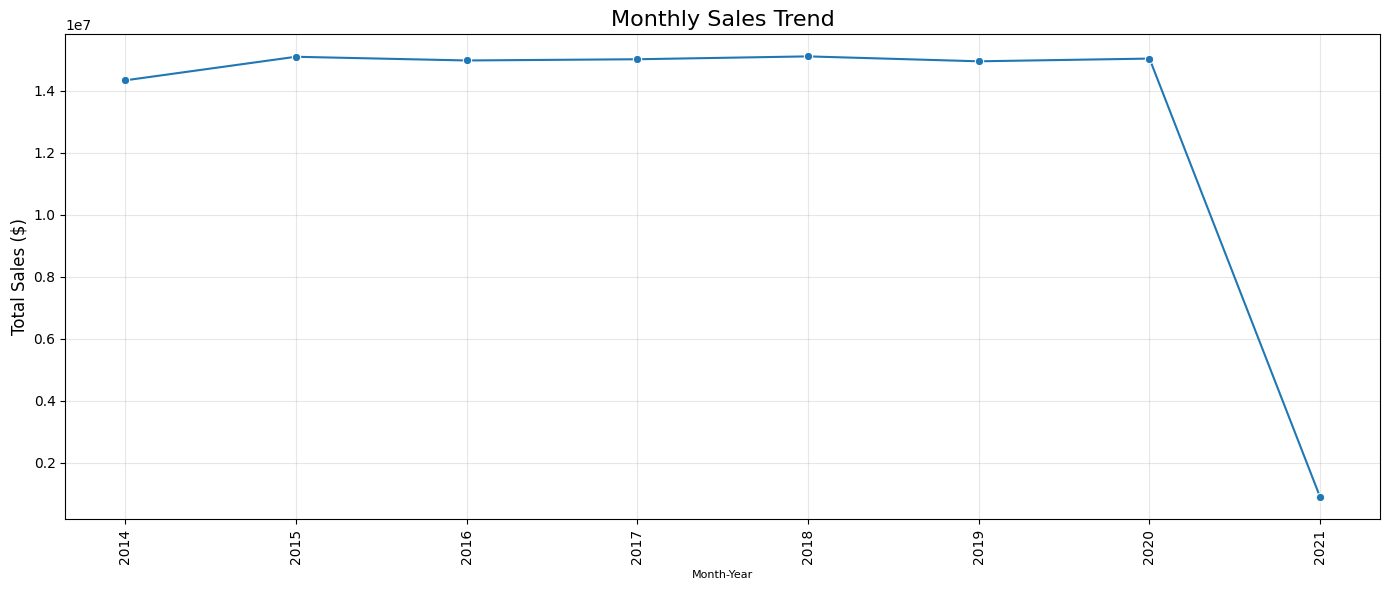

In [ ]:
# 1. yearly Sales Trend
x_sales = df.groupby('year')['total_price'].sum().reset_index()
x_sales['year'] = x_sales['year'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=x_sales, x='year', y='total_price', marker='o')
plt.title('yearly Sales Trend', fontsize=16)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color:#2596be; border-left:6px solid #2196F3; padding:10px;">
  <strong style = "color:black">Note:</strong>
   <div style = "color:black">  📌All years has almost same sales. </div>
   <div style = "color:black">  📌year 2021 has low sales because it has only january data </div>
</div>


#### 2. Month_yearly Sales Trend

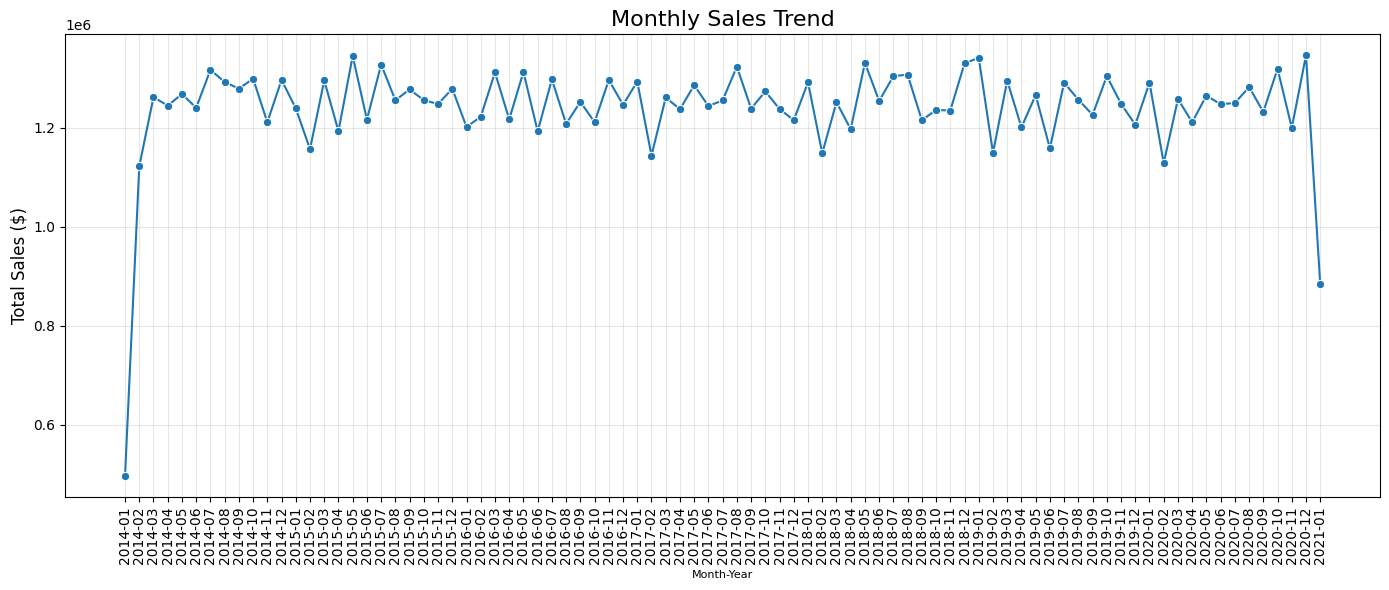

In [ ]:
# 1. month_yearly Sales Trend
monthly_sales = df.groupby('month_year')['total_price'].sum().reset_index()
monthly_sales['month_year'] = monthly_sales['month_year'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month_year', y='total_price', marker='o')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color:#2596be; border-left:6px solid #2196F3; padding:10px;">
  <strong style = "color:black">Note:</strong>
   <div style = "color:black">  📌All months has almost same sales. </div>
   <div style = "color:black">  📌year 2021 january has low sales </div>
   <div style = "color:black">  📌year 2014 january has low sales  </div>
</div>

####  3. quarterly Sales Trend 

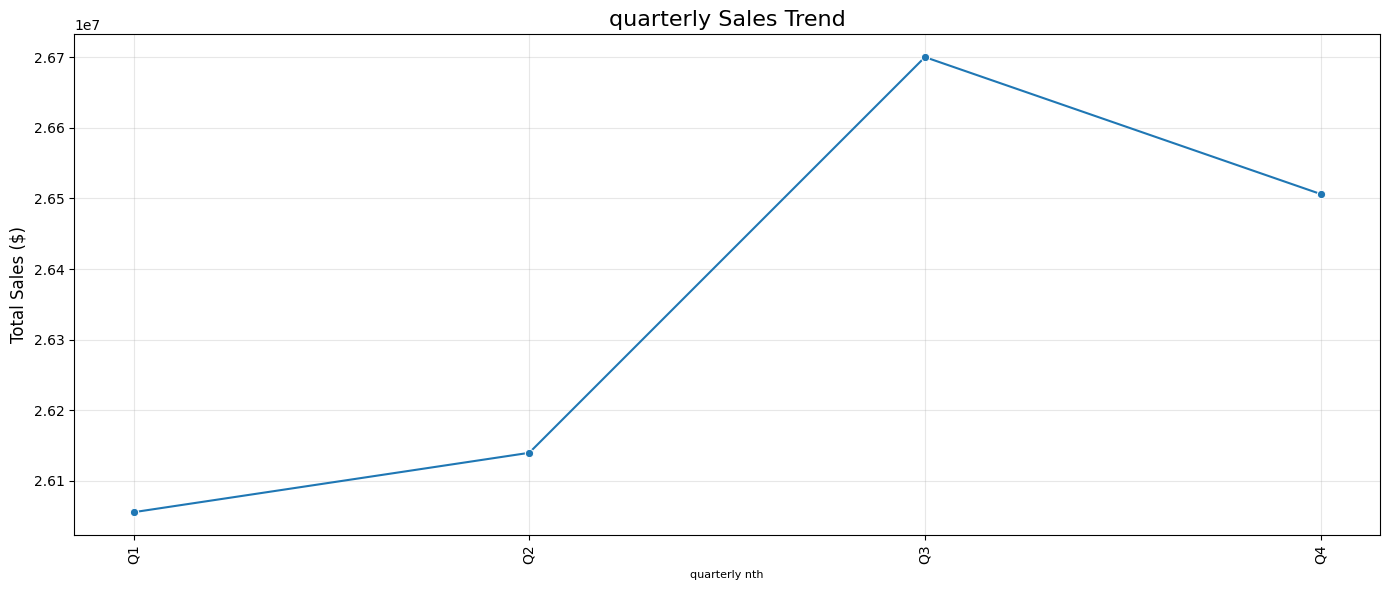

In [317]:
# 3. quarterly Sales Trend
x_sales = df.groupby('quarter')['total_price'].sum().reset_index()
x_sales['quarter'] = x_sales['quarter'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=x_sales, x='quarter', y='total_price', marker='o')
plt.title('quarterly Sales Trend', fontsize=16)
plt.xlabel('quarterly nth', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color:#2596be; border-left:6px solid #2196F3; padding:10px;">
  <strong style = "color:black">Note:</strong>
   <div style = "color:black">  📌Q3 and Q4 has lot of sales. </div>
   <div style = "color:black">  📌may be monthly Sales Trend can explain this </div>
</div>

####  4. monthly Sales Trend 

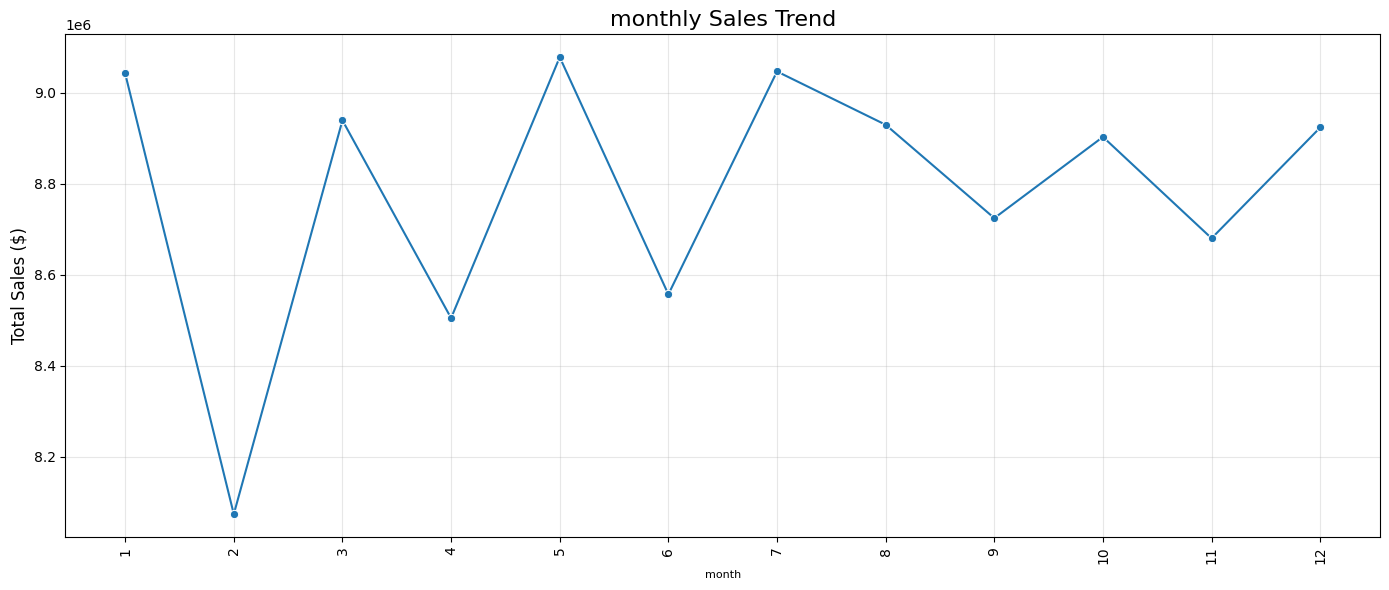

In [ ]:
# 4. monthly Sales Trend
x_sales = df.groupby('month')['total_price'].sum().reset_index()
x_sales['month'] = x_sales['month'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=x_sales, x='month', y='total_price', marker='o')
plt.title('monthly Sales Trend', fontsize=16)
plt.xlabel('month', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color:#2596be; border-left:6px solid #2196F3; padding:10px;">
  <strong style = "color:black">Note:</strong>
   <div style = "color:black">  📌this has no pattern. </div>
   <div style = "color:black">  📌feb has low sales because less days in feb </div>
   <div style = "color:black">  📌if month has less days sales are low, it make sence  </div>
</div>

#### 5. weekly Sales Trend

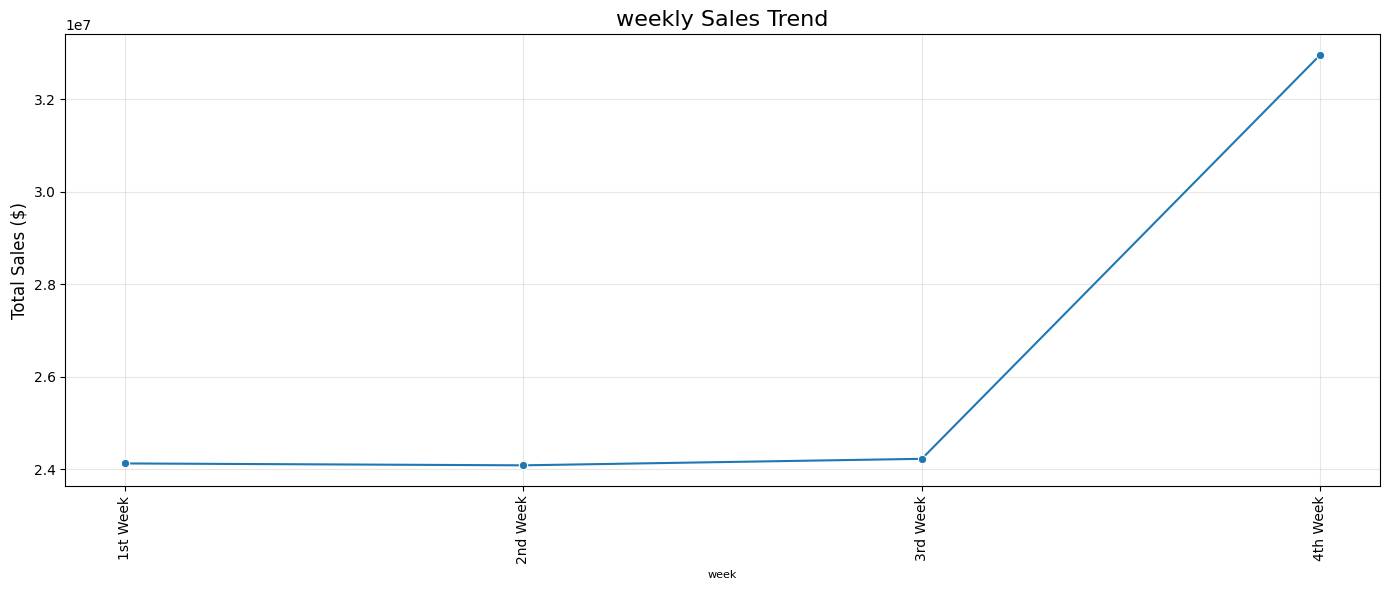

In [318]:
# 5. week Sales Trend
x_sales = df.groupby('week')['total_price'].sum().reset_index()
x_sales['week'] = x_sales['week'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=x_sales, x='week', y='total_price', marker='o')
plt.title('weekly Sales Trend', fontsize=16)
plt.xlabel('week', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color:#2596be; border-left:6px solid #2196F3; padding:10px;">
  <strong style = "color:black">Note:</strong>
   <div style = "color:black">  📌4th week has a big sale improvement. </div>
   <div style = "color:black">  📌because most of people get paid in end of the month  </div>
</div>

#### 6. daily Sales Trend

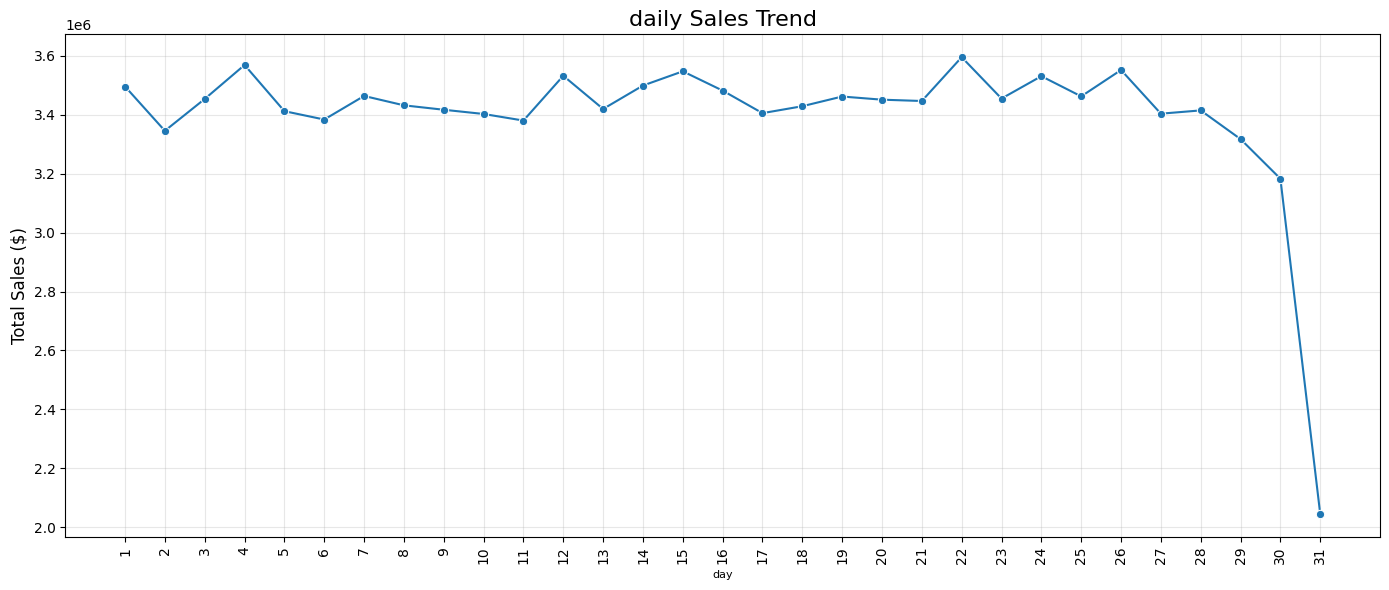

In [ ]:
# 6. daily Sales Trend
x_sales = df.groupby('day')['total_price'].sum().reset_index()
x_sales['day'] = x_sales['day'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=x_sales, x='day', y='total_price', marker='o')
plt.title('daily Sales Trend', fontsize=16)
plt.xlabel('day', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color:#2596be; border-left:6px solid #2196F3; padding:10px;">
  <strong style = "color:black">Note:</strong>
   <div style = "color:black">  📌no pattern. </div>
   <div style = "color:black">  📌31 is low because month has less 31 </div>
</div>

#### 7. hourly Sales Trend

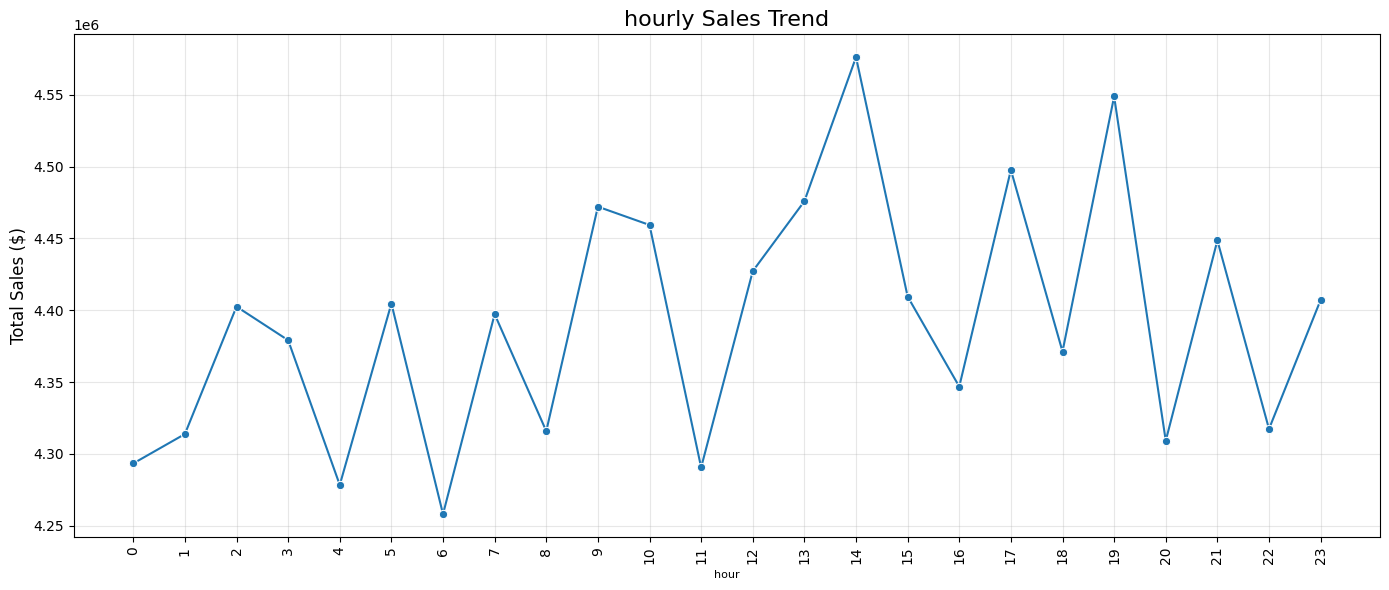

In [ ]:
# 7. hourly Sales Trend
x_sales = df.groupby('hour')['total_price'].sum().reset_index()
x_sales['hour'] = x_sales['hour'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=x_sales, x='hour', y='total_price', marker='o')
plt.title('hourly Sales Trend', fontsize=16)
plt.xlabel('hour', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### <span style="color:#0076cd; font-weight:bold">2. Locations wise Sales Trends analisis</span>

#### 1. Sales by made country

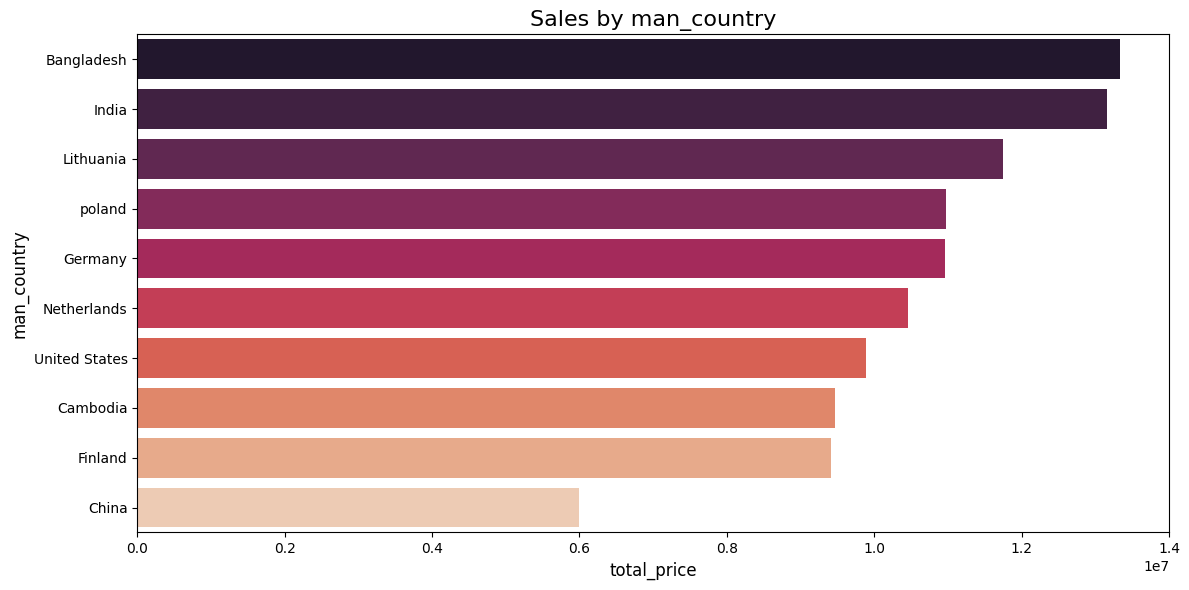

In [334]:
# 1. Sales by man_country
y_lbl = "man_country"
x_lbl = "total_price"

category_sales = df.groupby(y_lbl)[x_lbl].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, 
            x= x_lbl , 
            y= y_lbl,
            hue= y_lbl,
            palette='rocket')
plt.title('Sales by man_country', fontsize=16)
plt.xlabel(f'{x_lbl}', fontsize=12)
plt.ylabel(f'{y_lbl}', fontsize=12)
plt.tight_layout()
plt.show()

#### 2. Sales by store location (division) 

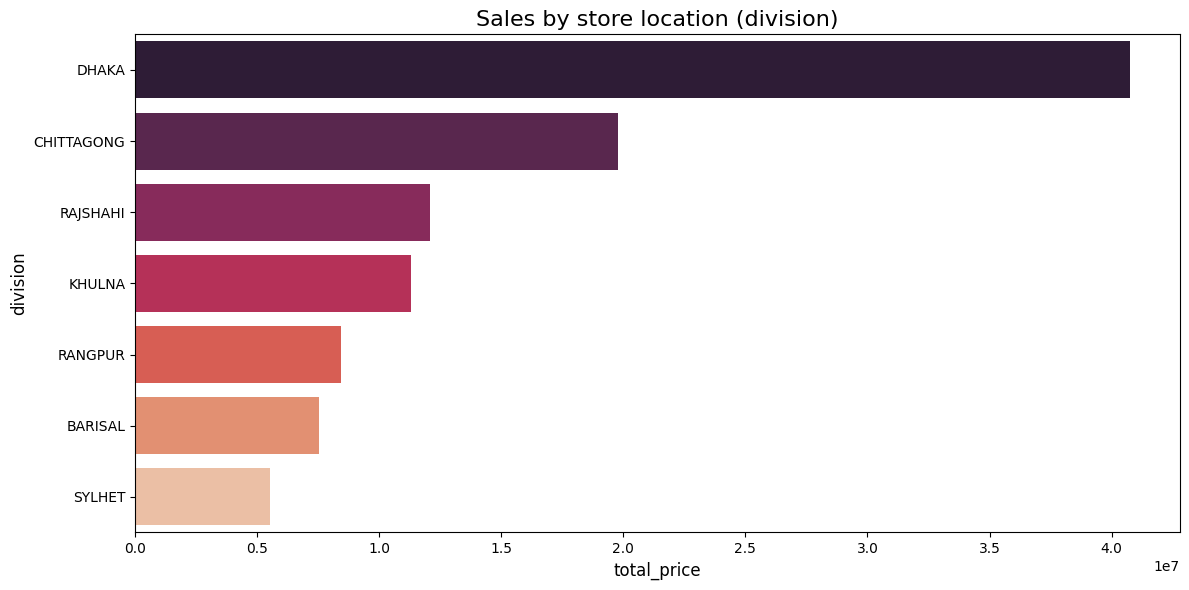

In [335]:
# 2. Sales by store location (division) 
y_lbl = "division"
x_lbl = "total_price"

category_sales = df.groupby(y_lbl)[x_lbl].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, 
            x= x_lbl , 
            y= y_lbl,
            hue= y_lbl,
            palette='rocket')
plt.title('Sales by store location (division)', fontsize=16)
plt.xlabel(f'{x_lbl}', fontsize=12)
plt.ylabel(f'{y_lbl}', fontsize=12)
plt.tight_layout()
plt.show()

In [336]:
# Create aggregated data
hierarchy_data = df.groupby(['division', 'district'])['total_price'].sum().reset_index()

fig = px.treemap(
    hierarchy_data,
    path=['division', 'district'],
    values='total_price',
    title='Sales Distribution by division > District ',
    color='total_price',
    color_continuous_scale='Tealrose'
)
fig.update_traces(textinfo="label+value+percent parent")
fig.show()

### <span style="color:#0076cd; font-weight:bold">2. product wise Sales Trends analisis</span>

#### 2. Sales by item_name

C:\Users\SINGER\AppData\Local\Temp\ipykernel_8384\4070397001.py:15: UserWarning:

Glyph 150 (\x96) missing from current font.

C:\Users\SINGER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 150 (\x96) missing from current font.



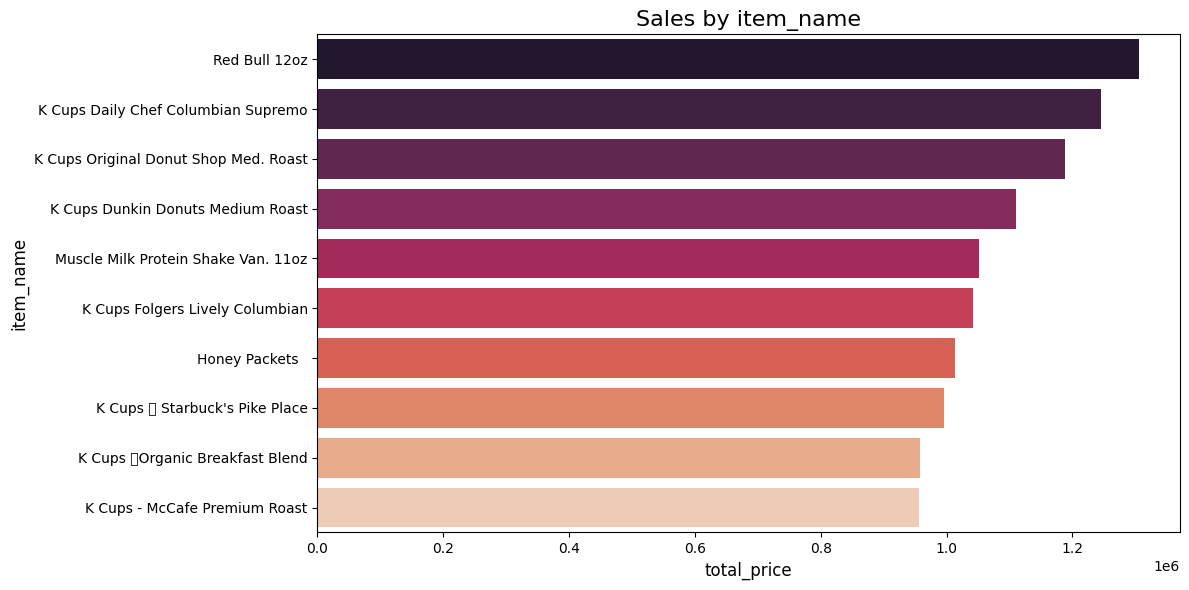

In [337]:
y_lbl = "item_name"
x_lbl = "total_price"

category_sales = df.groupby(y_lbl)[x_lbl].sum().sort_values(ascending=False).nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, 
            x= x_lbl , 
            y= y_lbl,
            hue= y_lbl,
            palette='rocket')
plt.title('Sales by item_name', fontsize=16)
plt.xlabel(f'{x_lbl}', fontsize=12)
plt.ylabel(f'{y_lbl}', fontsize=12)
plt.tight_layout()
plt.show()

#### 2. Sales by Category

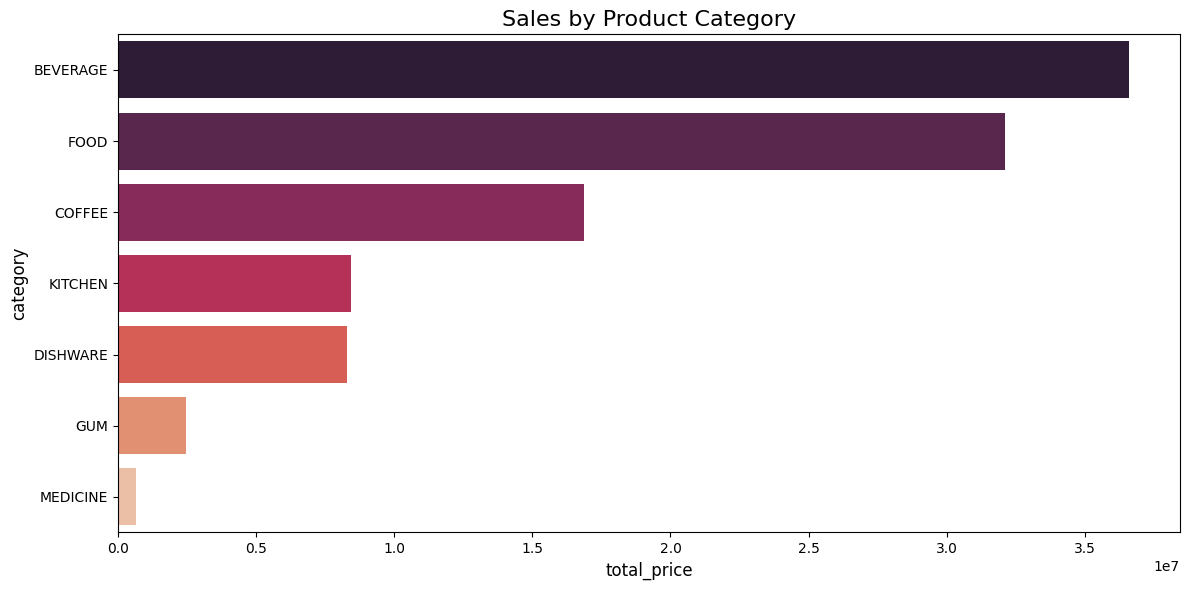

In [ ]:
# 2. Sales by Category
y_lbl = "category"
x_lbl = "total_price"

category_sales = df.groupby(y_lbl)[x_lbl].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, 
            x= x_lbl , 
            y= y_lbl,
            hue= y_lbl,
            palette='rocket')
plt.title('Sales by Product Category', fontsize=16)
plt.xlabel(f'{x_lbl}', fontsize=12)
plt.ylabel(f'{y_lbl}', fontsize=12)
plt.tight_layout()
plt.show()

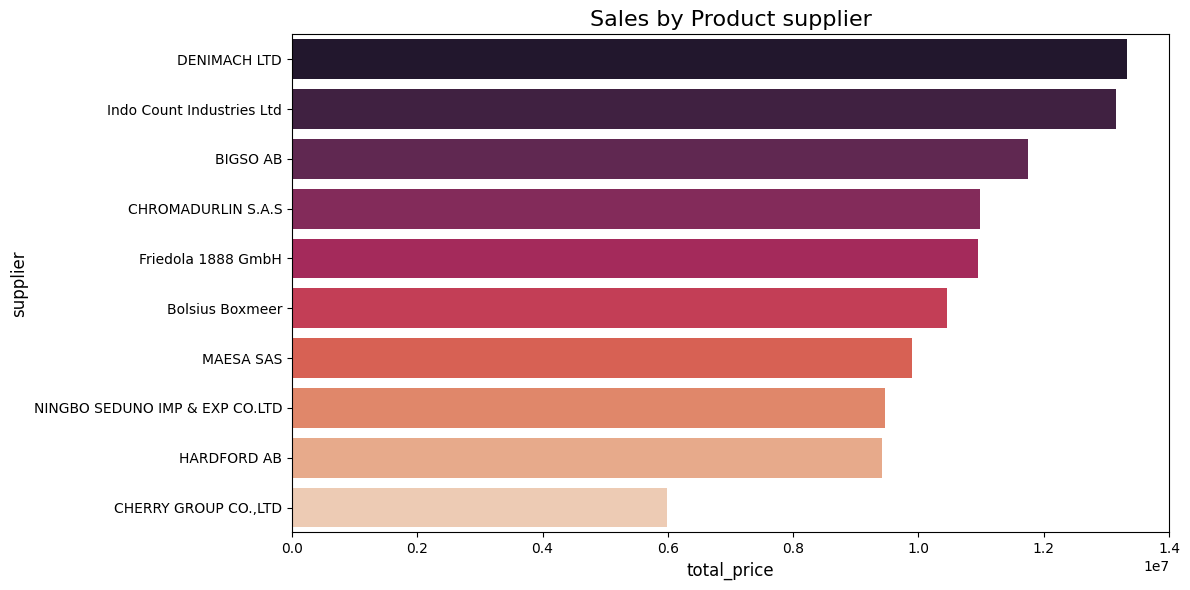

In [339]:
y_lbl = "supplier"
x_lbl = "total_price"

category_sales = df.groupby(y_lbl)[x_lbl].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, 
            x= x_lbl , 
            y= y_lbl,
            hue= y_lbl,
            palette='rocket')
plt.title('Sales by Product supplier', fontsize=16)
plt.xlabel(f'{x_lbl}', fontsize=12)
plt.ylabel(f'{y_lbl}', fontsize=12)
plt.tight_layout()
plt.show()

In [298]:
df.columns

Index(['payment_key', 'coustomer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'total_price', 'date', 'hour', 'day', 'week', 'month',
       'quarter', 'year', 'division', 'district', 'upazila', 'item_name',
       'desc', 'unit_price', 'man_country', 'supplier', 'unit', 'month_year',
       'category'],
      dtype='object')

# <span style="color:magenta; font-weight:bold">📊 Task 2 : Customer Behavior Analysis</span>
<hr>

In [356]:
# 1. TOP CUSTOMERS by total spent
top_customers = df.groupby('coustomer_key').agg(
    total_spent=('total_price', 'sum'),
    purchase_count=('payment_key', 'count')
).sort_values('total_spent', ascending=False).head(10)

print("\n🏆 Top 10 Customers by Spending:")
display(top_customers.style.background_gradient(cmap='Blues'))


🏆 Top 10 Customers by Spending:


,total_spent,purchase_count
coustomer_key,,
C004349,17104.500000,137
C005316,16853.250000,149
C000273,16645.750000,135
C001438,16381.500000,138
C007553,16288.750000,143
C007415,16282.500000,123
C008009,16194.750000,118
C007205,16154.500000,129
C002968,16006.500000,140


In [355]:
# 1. TOP CUSTOMERS by  purchase count
top_customers = df.groupby('coustomer_key').agg(
    total_spent=('total_price', 'sum'),
    purchase_count=('payment_key', 'count')
).sort_values('purchase_count', ascending=False).head(10)

print("\n🏆 Top 10 Customers by Spending:")
display(top_customers.style.background_gradient(cmap='Blues'))


🏆 Top 10 Customers by Spending:


,total_spent,purchase_count
coustomer_key,,
C006906,15922.000000,156
C005316,16853.250000,149
C008798,15567.500000,147
C001299,15053.750000,146
C000152,15624.500000,144
C002278,14962.000000,144
C002002,15047.500000,144
C006321,15403.250000,144
C007553,16288.750000,143


In [ ]:
# FREQUENT BUYER ANALYSIS
frequent_buyers = df.groupby('coustomer_key').agg(
    first_purchase=('date', 'min'),
    last_purchase=('date', 'max'),
    purchase_count=('payment_key', 'count'),
    total_spent=('total_price', 'sum')
).sort_values('purchase_count', ascending=False)

# Calculate days as customer
frequent_buyers['days_as_customer'] = (frequent_buyers['last_purchase'] - frequent_buyers['first_purchase']).dt.days
frequent_buyers['purchase_frequency'] = frequent_buyers['purchase_count'] / frequent_buyers['days_as_customer'].replace(0, 1)  

# Filter for frequent buyers (top 20% by purchase count)
threshold = frequent_buyers['purchase_count'].quantile(0.8)
frequent_customers = frequent_buyers[frequent_buyers['purchase_count'] >= threshold]

print(f"🔄 Found {len(frequent_customers)} frequent buyers (top 20% by purchase frequency)")
display(frequent_customers.head(10).style.format({
    'first_purchase': '{:%Y-%m-%d}',
    'last_purchase': '{:%Y-%m-%d}',
    'total_spent': '${:,.2f}',
    'purchase_frequency': '{:.2f} purchases/day'
}))


🔄 Found 1852 frequent buyers (top 20% by purchase frequency)


,first_purchase,last_purchase,purchase_count,total_spent,days_as_customer,purchase_frequency
coustomer_key,,,,,,
C006906,2014-01-28,2021-01-04,156,"$15,922.00",2532,0.06 purchases/day
C005316,2014-01-28,2021-01-13,149,"$16,853.25",2542,0.06 purchases/day
C008798,2014-02-04,2021-01-16,147,"$15,567.50",2538,0.06 purchases/day
C001299,2014-02-13,2021-01-16,146,"$15,053.75",2528,0.06 purchases/day
C000152,2014-02-13,2021-01-16,144,"$15,624.50",2528,0.06 purchases/day
C002278,2014-01-21,2021-01-15,144,"$14,962.00",2550,0.06 purchases/day
C002002,2014-01-22,2021-01-20,144,"$15,047.50",2555,0.06 purchases/day
C006321,2014-03-08,2020-12-15,144,"$15,403.25",2473,0.06 purchases/day
C007553,2014-02-01,2021-01-10,143,"$16,288.75",2535,0.06 purchases/day


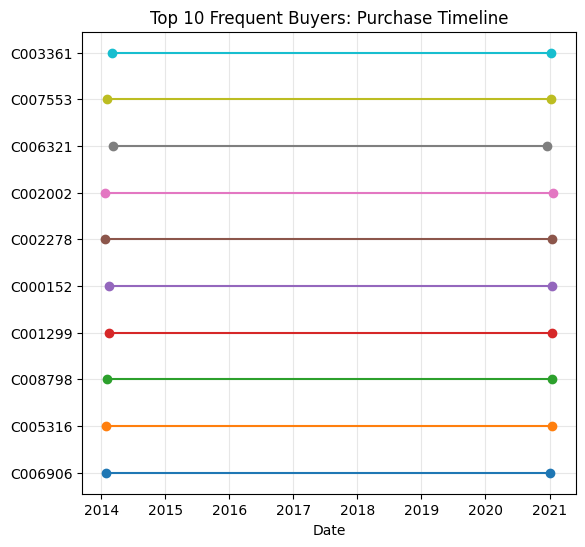

In [361]:
# Visualization
plt.figure(figsize=(14, 6))

# Top 10 frequent buyers timeline
top_10 = frequent_customers.head(10).reset_index()
plt.subplot(1, 2, 1)
for i, row in top_10.iterrows():
    plt.plot([row['first_purchase'], row['last_purchase']], [i, i], 
             marker='o', label=row['coustomer_key'])
plt.yticks(range(len(top_10)), top_10['coustomer_key'])
plt.title('Top 10 Frequent Buyers: Purchase Timeline')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)

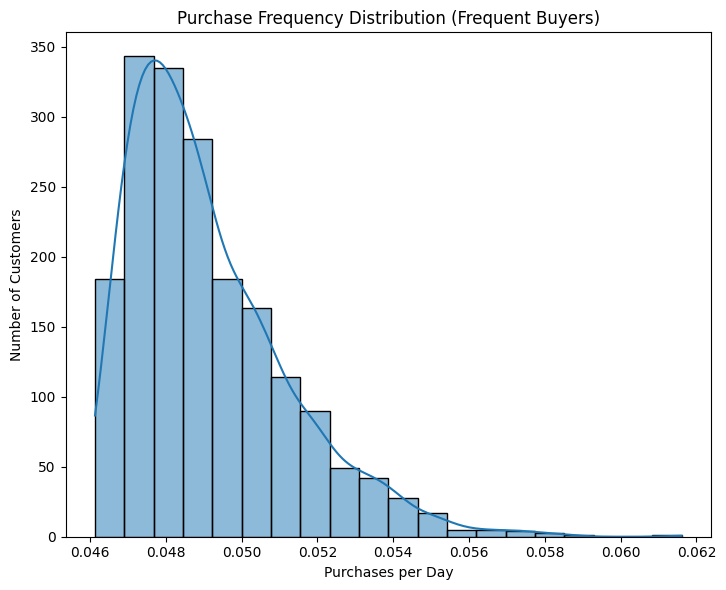

In [360]:
# Visualization
plt.figure(figsize=(14, 6))

# Purchase frequency distribution
plt.subplot(1, 2, 2)
sns.histplot(frequent_customers['purchase_frequency'], bins=20, kde=True)
plt.title('Purchase Frequency Distribution (Frequent Buyers)')
plt.xlabel('Purchases per Day')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()